In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [45]:
df= pd.read_csv("data.csv")

In [46]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [47]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=['float', 'int']).columns

# create scaler object
scaler = MinMaxScaler()

# fit and transform on numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [48]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,Feb,0.000000,0.000000,0.000,0.000000,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,Feb,0.142857,0.083333,0.000,0.052632,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,Feb,0.428571,0.000000,1.000,0.105263,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,Feb,0.285714,0.083333,0.125,0.157895,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,Feb,0.285714,0.166667,0.000,0.157895,Returning_Visitor,True,False


In [49]:
df['VisitorType'] = pd.factorize(df['VisitorType'])[0]

In [50]:
df['Month'] = pd.factorize(df['Month'])[0]

In [51]:
df = df.replace({True: 1, False: 0})

In [52]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.000000,0.000000,0.000,0.000000,0,0,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0,0.142857,0.083333,0.000,0.052632,0,0,0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.428571,0.000000,1.000,0.105263,0,0,0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0,0.285714,0.083333,0.125,0.157895,0,0,0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0,0.285714,0.166667,0.000,0.157895,0,1,0


In [53]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [54]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.000000,0.000000,0.000,0.000000,0,0,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0,0.142857,0.083333,0.000,0.052632,0,0,0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.428571,0.000000,1.000,0.105263,0,0,0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0,0.285714,0.083333,0.125,0.157895,0,0,0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0,0.285714,0.166667,0.000,0.157895,0,1,0


<AxesSubplot:>

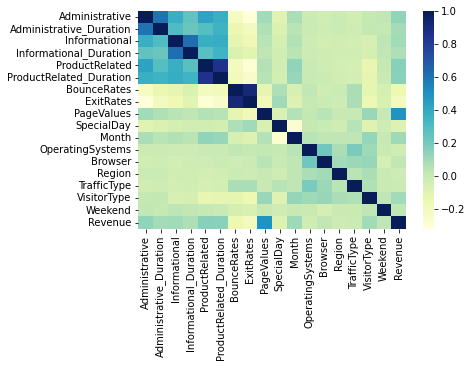

In [55]:
import seaborn as sns
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [56]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.000000,0.000000,0.000,0.000000,0,0,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0,0.142857,0.083333,0.000,0.052632,0,0,0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.428571,0.000000,1.000,0.105263,0,0,0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0,0.285714,0.083333,0.125,0.157895,0,0,0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0,0.285714,0.166667,0.000,0.157895,0,1,0


In [57]:
X= df.loc[:, df.columns != 'Revenue']
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.000000,0.000000,0.000,0.000000,0,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0,0.142857,0.083333,0.000,0.052632,0,0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0,0.428571,0.000000,1.000,0.105263,0,0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0,0.285714,0.083333,0.125,0.157895,0,0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0,0.285714,0.166667,0.000,0.157895,0,1


In [58]:
Y=df['Revenue']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [59]:
Y.isna().sum()

0

In [60]:
# for i in range(10):
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    

In [61]:
 print(f"Sample {i+1}: Training set size={len(X_train)}, Testing set size={len(X_test)}")

Sample 1: Training set size=8631, Testing set size=3699


In [62]:
X_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2203,0.000000,0.000000,0.125000,0.184359,0.119149,0.060682,0.024548,0.104439,0.028229,0.0,2,0.142857,0.250000,0.000,0.000000,0,0
2185,0.111111,0.030011,0.083333,0.042363,0.072340,0.027235,0.018182,0.046144,0.000000,0.0,2,0.000000,0.000000,0.000,0.052632,0,1
2646,0.000000,0.000000,0.000000,0.000000,0.011348,0.001641,0.000000,0.062500,0.000000,0.0,2,0.428571,0.000000,0.000,0.105263,0,0
8185,0.148148,0.173092,0.000000,0.000000,0.018440,0.009865,0.035294,0.167647,0.000000,0.0,7,0.142857,0.916667,0.750,0.052632,0,0
7896,0.000000,0.000000,0.000000,0.000000,0.136170,0.019255,0.010638,0.051345,0.000000,0.0,5,0.142857,0.250000,0.250,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.000000,0.000000,0.000000,0.000000,0.018440,0.006128,0.000000,0.134615,0.000000,0.6,2,0.285714,0.083333,0.000,0.631579,0,0
7366,0.111111,0.030953,0.000000,0.000000,0.035461,0.012989,0.035714,0.021429,0.194214,0.0,7,0.142857,0.083333,0.000,0.052632,0,0
2437,0.000000,0.000000,0.000000,0.000000,0.002837,0.000625,0.000000,0.500000,0.000000,0.0,2,0.285714,0.083333,0.250,0.157895,0,0
5557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,7,0.000000,0.000000,1.000,0.105263,0,0


In [63]:
from sklearn.svm import SVC
svm = SVC()


In [64]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'kernel': ['linear', 'rbf'], 
#                   'C': [0.1, 1, 10, 100, 1000], 
#                   'gamma': [0.1, 1, 10, 100, 1000],
#                   'max_iter': [1000]}
# grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)


In [65]:
# from sklearn.svm import NuSVR
# from sklearn.model_selection import GridSearchCV

# def optimize_svm(X, y):
#     # Define parameter grid to search over
#     param_grid = {
#         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#         'nu': [0.25, 0.5, 0.75],
#         'epsilon': [0.1, 0.2, 0.3]
#     }

#     # Define SVM model
#     svm_model = NuSVR()

#     # Perform grid search with cross-validation
#     grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
#     grid_search.fit(X, y)

#     # Print best parameters
#     print("Best SVM Parameters: Kernel - {}, Nu - {}, Epsilon - {}".format(
#         grid_search.best_params_['kernel'], 
#         grid_search.best_params_['nu'],
#         grid_search.best_params_['epsilon']
#     ))

#     return grid_search.best_estimator_

In [66]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

def optimize_svm(X, y):
    # Define the parameter grid to search over
    param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'nu': [0.25, 0.5, 0.75],
                  'epsilon': [0.1, 0.2, 0.5]}

    # Create the SVM model
    svr = svm.SVR(kernel='poly')

    # Create a scorer using mean squared error
    scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(svr, param_grid, scoring=scorer, cv=5)
    grid_search.fit(X, y)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", -grid_search.best_score_)

    # Return the best model
    return grid_search.best_estimator_

In [67]:
# from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings("ignore")

# # Define the number of iterations and the number of samples
# n_iter = 100
# n_samples = 10

# # Loop over the samples
# for i in range(n_samples):
#     print(f"Sample {i+1}:")
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
#     # Optimize the SVM model using grid search with cross-validation
#     svm_model = optimize_svm(X_train, y_train)
    
#     # Evaluate the SVM model on the testing set
#     accuracy = svm_model.score(X_test, y_test)
#     print(f"Accuracy: {accuracy:.4f}\n")

In [84]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [90]:
samples

[(       Administrative  Administrative_Duration  Informational  \
  11332        0.037037                 0.002096       0.250000   
  12071        0.000000                 0.000000       0.000000   
  10023        0.000000                 0.000000       0.000000   
  6771         0.333333                 0.132348       0.000000   
  4283         0.000000                 0.000000       0.041667   
  ...               ...                      ...            ...   
  4859         0.037037                 0.001177       0.000000   
  3264         0.000000                 0.000000       0.000000   
  9845         0.481481                 0.097678       0.208333   
  10799        0.000000                 0.000000       0.000000   
  2732         0.111111                 0.013387       0.000000   
  
         Informational_Duration  ProductRelated  ProductRelated_Duration  \
  11332                0.409484        0.103546                 0.056042   
  12071                0.000000        0.

In [85]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [86]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [89]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.82 Best Kernel =  rbf Best Nu =  4.78 Best Epsilon =  2.49
Best Accuracy =  0.83 Best Kernel =  rbf Best Nu =  0.66 Best Epsilon =  8.5
Best Accuracy =  0.83 Best Kernel =  rbf Best Nu =  3.33 Best Epsilon =  0.71
Best Accuracy =  0.82 Best Kernel =  rbf Best Nu =  7.31 Best Epsilon =  1.67
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  5.34 Best Epsilon =  3.78
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  2.22 Best Epsilon =  5.25
Best Accuracy =  0.84 Best Kernel =  rbf Best Nu =  2.28 Best Epsilon =  7.67
Best Accuracy =  0.57 Best Kernel =  sigmoid Best Nu =  9.42 Best Epsilon =  1.63
Best Accuracy =  0.83 Best Kernel =  rbf Best Nu =  8.41 Best Epsilon =  6.31
Best Accuracy =  0.82 Best Kernel =  rbf Best Nu =  4.29 Best Epsilon =  6.76


In [96]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.82,rbf,4.78,2.49
1,2,0.83,rbf,0.66,8.50
2,3,0.83,rbf,3.33,0.71
3,4,0.82,rbf,7.31,1.67
4,5,0.79,rbf,5.34,3.78
5,6,0.79,rbf,2.22,5.25
6,7,0.84,rbf,2.28,7.67
7,8,0.57,sigmoid,9.42,1.63
8,9,0.83,rbf,8.41,6.31
9,10,0.82,rbf,4.29,6.76


In [91]:

X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [93]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).

In [94]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

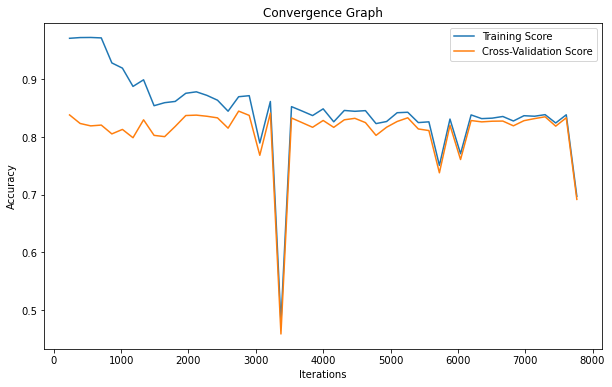

In [95]:

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()